In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('crop_production.csv')
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


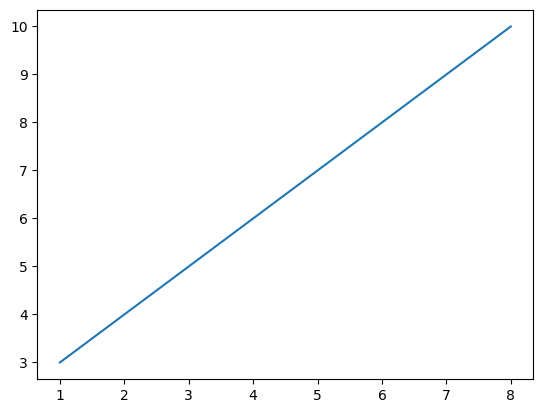

In [7]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints,ypoints)

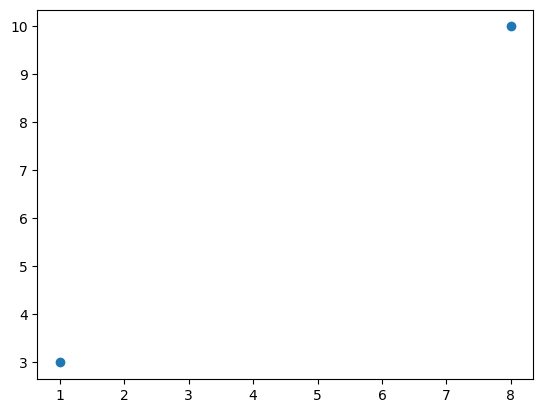

In [8]:
import matplotlib.pyplot as plt

x = np.array([1, 8])
y = np.array([3, 10])

plt.plot(x,y,'o')

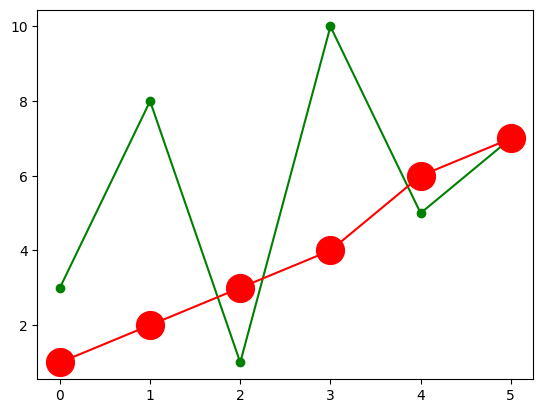

In [16]:
import matplotlib.pyplot as plt
ypoints = np.array([3, 8, 1, 10, 5, 7])
ypoints2 = np.array([1,2,3,4,6,7])

plt.plot(ypoints,'o-g')
plt.plot(ypoints2,'o-r')
plt.show()

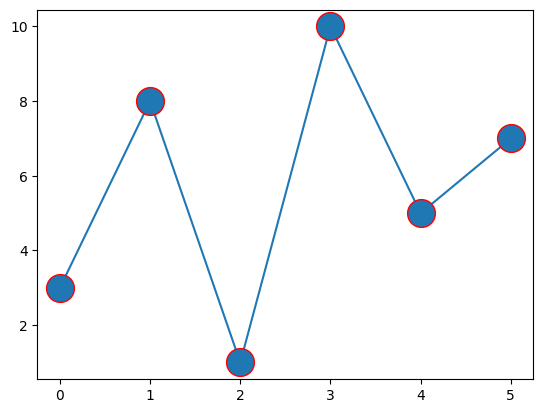

In [17]:
plt.plot(ypoints, marker = 'o', ms = 20, mec = 'r')
plt.show()

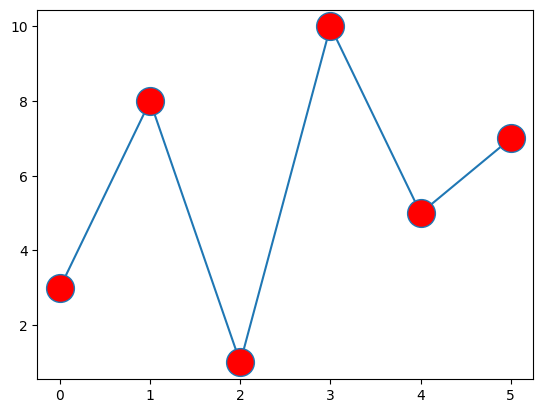

In [18]:
plt.plot(ypoints, marker = 'o', ms = 20, mfc = 'r')
plt.show()

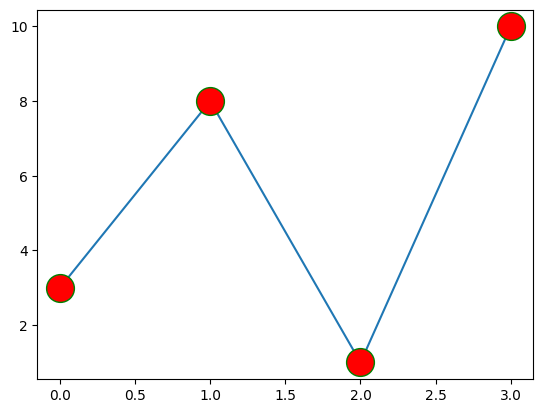

In [20]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o', ms = 20, mec = 'g', mfc = 'r')
plt.show()

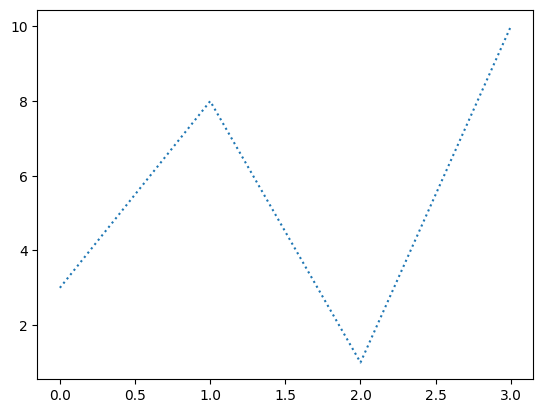

In [21]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = 'dotted')
plt.show()

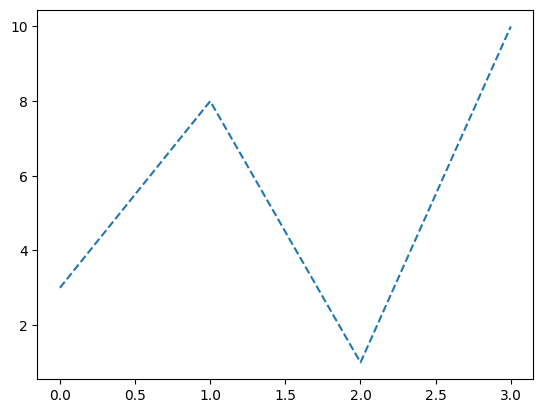

In [22]:
plt.plot(ypoints,linestyle = 'dashed')

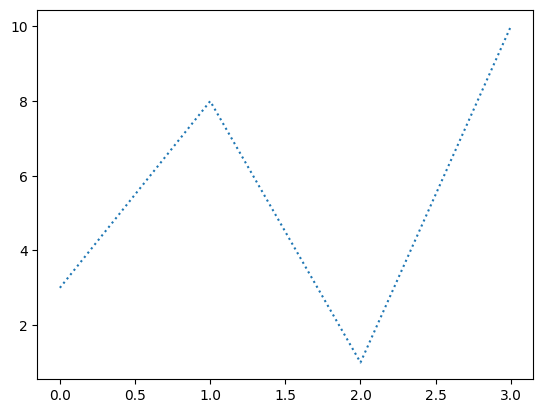

In [23]:
plt.plot(ypoints, ls = ':')

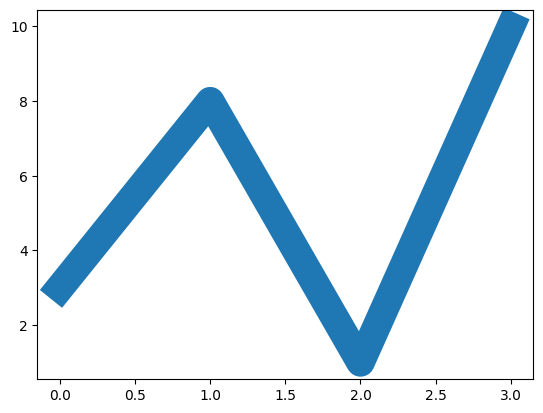

In [24]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linewidth = '20.5')
plt.show()

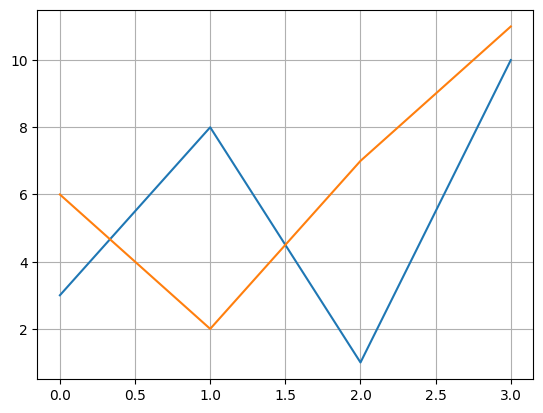

In [27]:
import matplotlib.pyplot as plt
import numpy as np

y1 = np.array([3, 8, 1, 10])
y2 = np.array([6, 2, 7, 11])

plt.plot(y1)
plt.plot(y2)
plt.grid()

plt.show()

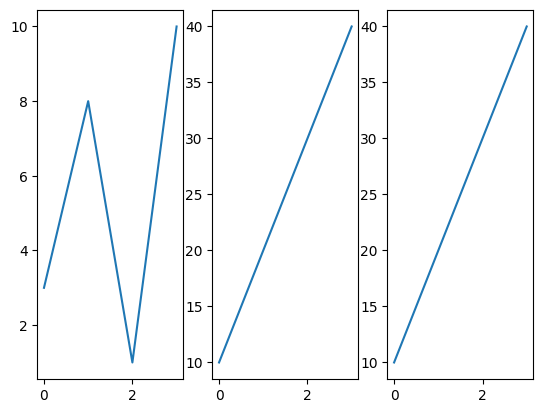

In [29]:
import matplotlib.pyplot as plt
import numpy as np

#plot 1:
x = np.array([0, 1, 2, 3])
y = np.array([3, 8, 1, 10])

plt.subplot(1, 3, 1)
plt.plot(x,y)

#plot 2:
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 3, 2)
plt.plot(x,y)

#plot 3
x = np.array([0, 1, 2, 3])
y = np.array([10, 20, 30, 40])

plt.subplot(1, 3, 3)
plt.plot(x,y)

plt.show()

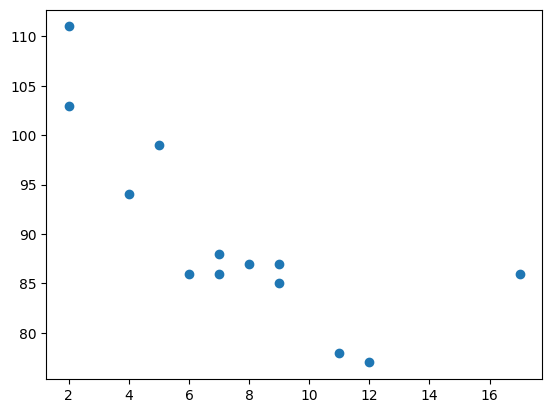

In [30]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])

plt.scatter(x, y)
plt.show()

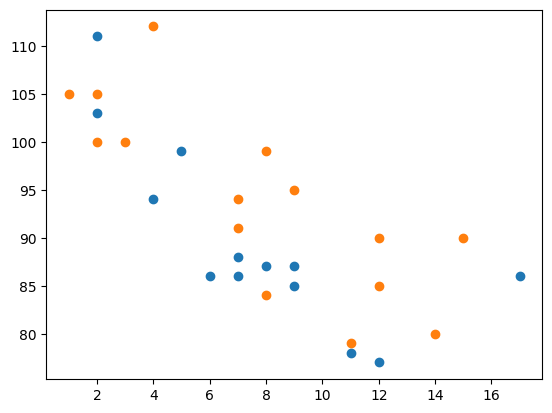

In [31]:
import matplotlib.pyplot as plt
import numpy as np

#day one, the age and speed of 13 cars:
x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)

#day two, the age and speed of 15 cars:
x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

plt.show()

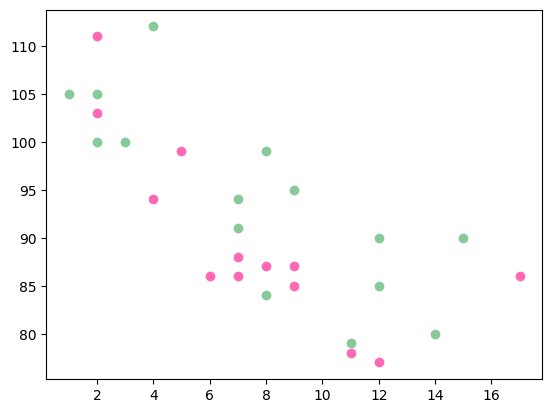

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y, color = 'hotpink')

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y, color = '#88c999')

plt.show()

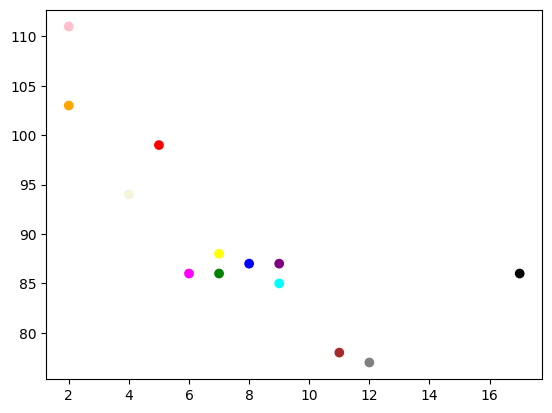

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])

plt.scatter(x, y, c=colors)

plt.show()

In [ ]:
import pandas as pd
